In [1]:
#import Pkg;
#Pkg.add("OptimalControl")
using OptimalControl

# Methode directe avec Tool Box

In [2]:
t0 = 0      # initial time
tf = 40.0
# Dynamics
const b = 1
const e = 1
const a = 1

F1(x) = begin
    return  (b/(e+x))
end

F2(x) = begin
    return  ((a*x)/(e+x)) 
end;
G(x) = begin 
    return (1/(e+x))
end;

Problem(x0) = begin 

    @def ocp begin # definition of the optimal control problem

        t ∈ [ t0, tf ], time
        x ∈ R, state
        u ∈ R, control

        x(t0) == x0

        -x(t) ≤ 0.0
        -1.0 ≤ u(t) ≤ 1.0

        ẋ(t) == (1+u(t))/2 * F1(x(t)) - (1 - u(t))/2 * F2(x(t))
        
        ∫(u(t)*G(x(t)))  → max

    end;
    return  solve(ocp, grid_size=1500)

end
Problem(1.0)


Method = (:direct, :adnlp, :ipopt)
This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    15002
Number of nonzeros in inequality constraint Jacobian.:     1501
Number of nonzeros in Lagrangian Hessian.............:     3002

Total number of variables............................:     4503
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     1501
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3002
Total number of inequality constraints...............:     1501
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:     1501

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 9.00e-01 2.90e-01   0.

CTBase.OptimalControlSolution

# Plot test : 

Method = (:direct, :adnlp, :ipopt)
This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    15002
Number of nonzeros in inequality constraint Jacobian.:     1501
Number of nonzeros in Lagrangian Hessian.............:     3002

Total number of variables............................:     4503
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     1501
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3002
Total number of inequality constraints...............:     1501
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:     1501

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.00e-01 2.90e-01   0.

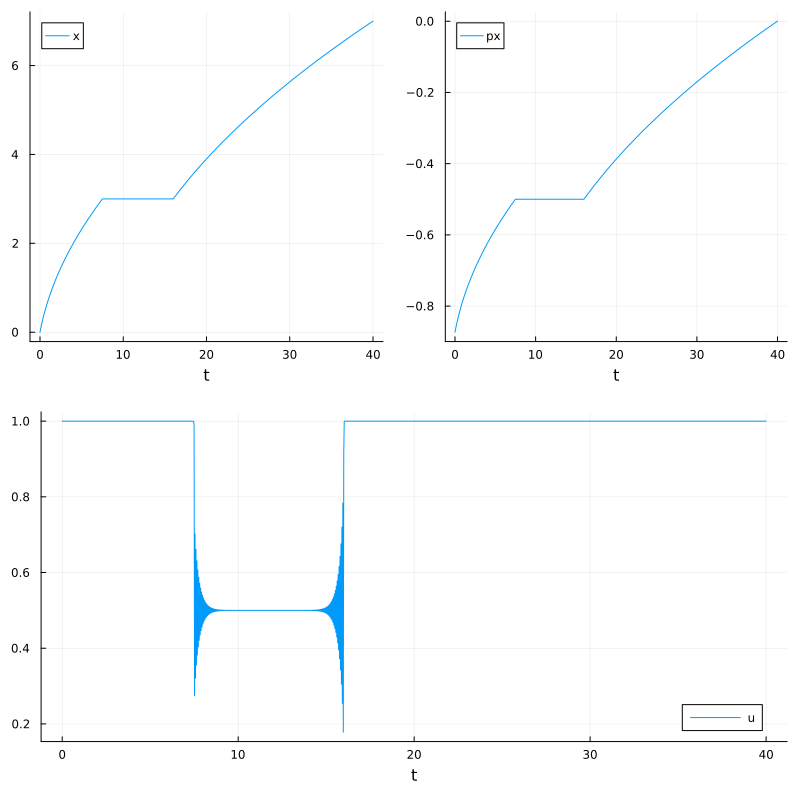

In [3]:
plt = plot(Problem(0.0), size=(800, 800))

# Plot pour plusieurs conditions initiales

Method = (:direct, :adnlp, :ipopt)
This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    15002
Number of nonzeros in inequality constraint Jacobian.:     1501
Number of nonzeros in Lagrangian Hessian.............:     3002

Total number of variables............................:     4503
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     1501
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3002
Total number of inequality constraints...............:     1501
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:     1501

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.00e-01 2.90e-01   0.

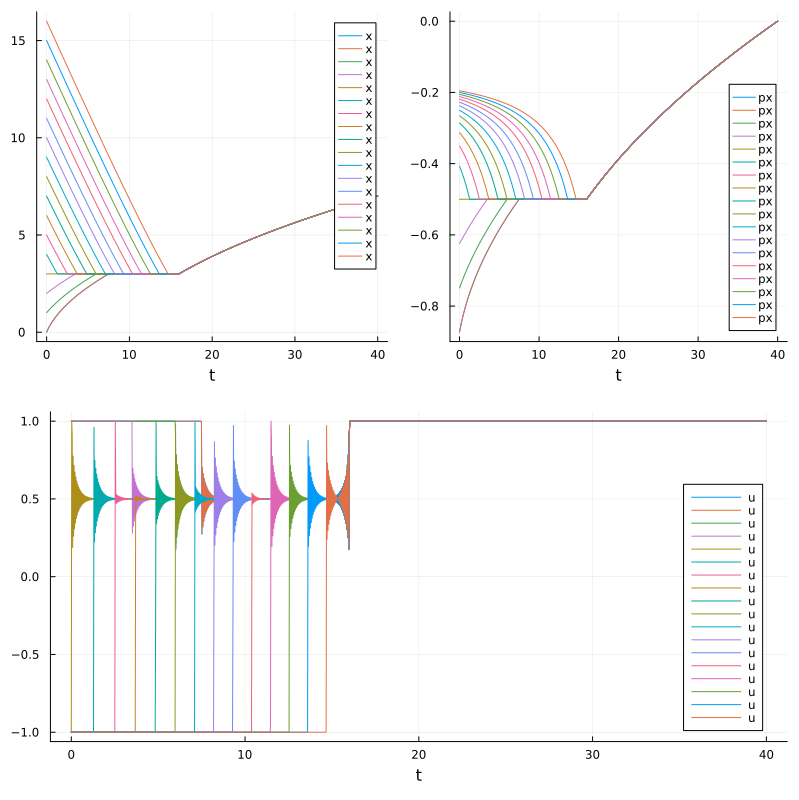

In [4]:
plt = plot(Problem(0.0), size=(800, 800))
for i =0.0 : 1.0:16
    direct_sol = Problem(i)
    plot!(direct_sol, size=(800, 800),label=false)
end
display(plt)
#Pense à ajouter une fonction pour minimiser le nombre d'interations pour les premiers guess.